<a href="https://colab.research.google.com/github/lagmayjanica03-a11y/cuddly-potato/blob/main/Python_Code_for_tsa__CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

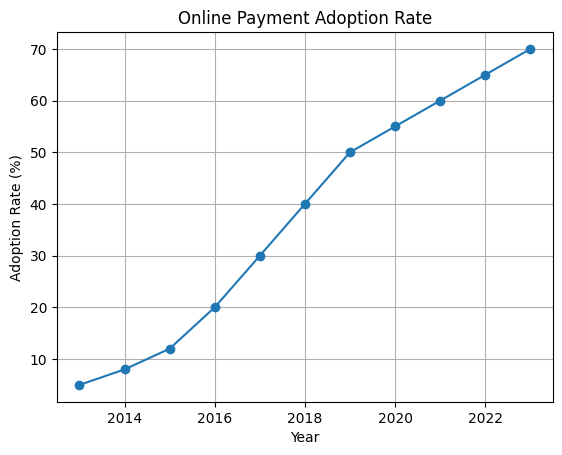

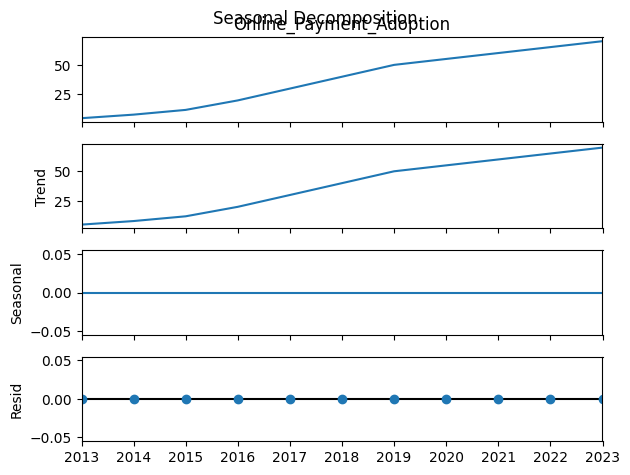

ADF Test Statistic: -0.25470456989881696
p-value: 0.9316790371596949
ADF after differencing: -6.292170970944445
p-value: 3.57713625209351e-08


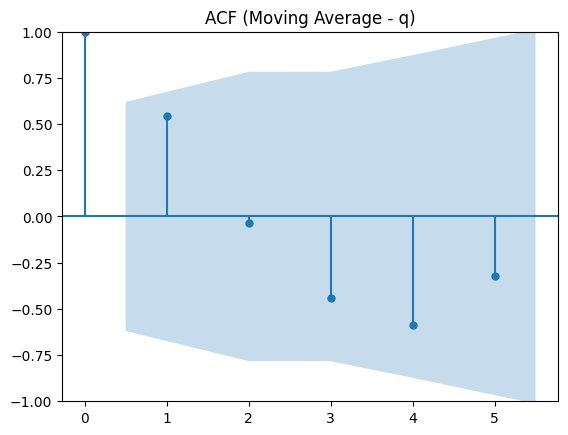

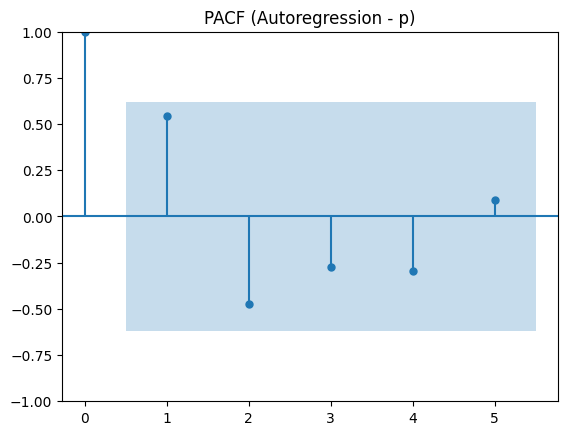

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

Model 1 AIC: 51.32012125514308
Model 1 BIC: 52.227876534125215
Model 1 RMSE (in-sample): 2.2834620522490265
Model 2 AIC: 52.31609223576973
Model 2 BIC: 53.52643260774592
Model 2 RMSE (in-sample): 2.2364879625291296


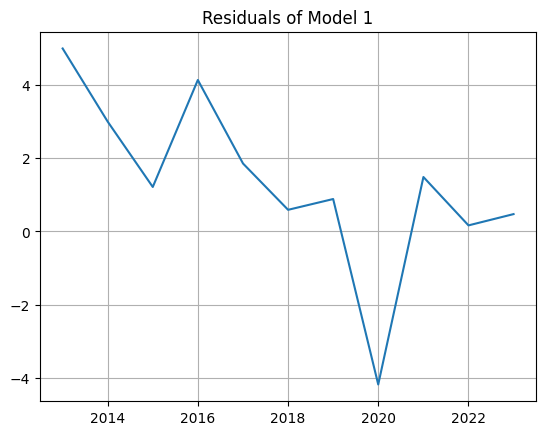

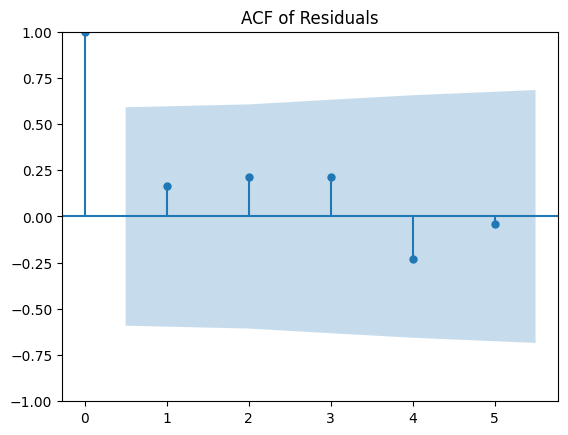

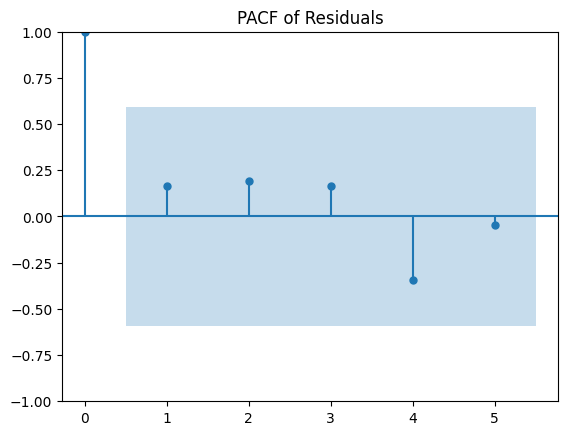

Ljung-Box Test Results:
       lb_stat  lb_pvalue
10  11.329251   0.332448


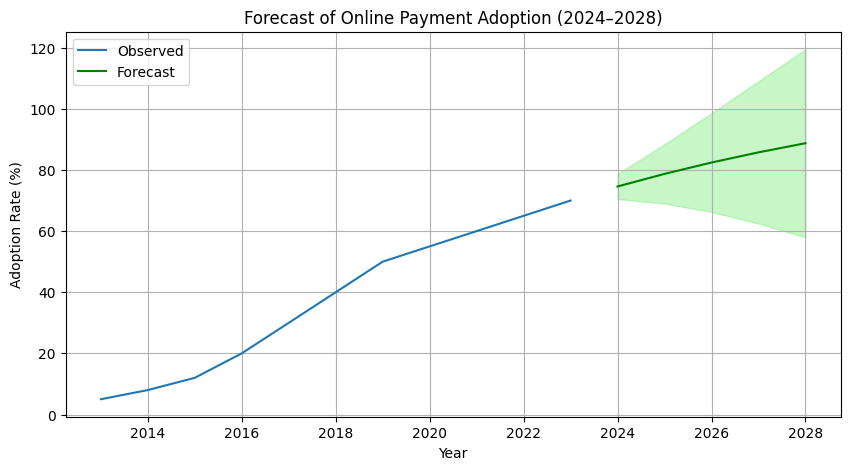

In [1]:
# 📌 Step 1: Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data
data = {
    'Year': list(range(2013, 2024)),
    'Online_Payment_Adoption': [5, 8, 12, 20, 30, 40, 50, 55, 60, 65, 70]
}
df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# 📌 Step 2: Line plot to visualize trend (Visualization)
plt.plot(df, marker='o')
plt.title('Online Payment Adoption Rate')
plt.xlabel('Year')
plt.ylabel('Adoption Rate (%)')
plt.grid()
plt.show()

# 📌 Step 3: Seasonal decomposition (exploratory – may not show much for annual data)
decomposition = sm.tsa.seasonal_decompose(df['Online_Payment_Adoption'], model='additive', period=1)
decomposition.plot()
plt.suptitle("Seasonal Decomposition")
plt.show()

# 📌 Step 4: ADF test to check stationarity (Stationarity Testing)
result = adfuller(df['Online_Payment_Adoption'])
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])

# 📌 Step 5: Differencing (if non-stationary)
df_diff = df['Online_Payment_Adoption'].diff().dropna()

# Optional: ADF test again to confirm stationarity after differencing
result_diff = adfuller(df_diff)
print("ADF after differencing:", result_diff[0])
print("p-value:", result_diff[1])

# 📌 Step 6: Plot ACF and PACF to help identify p and q
sm.graphics.tsa.plot_acf(df_diff)
plt.title("ACF (Moving Average - q)")
plt.show()

sm.graphics.tsa.plot_pacf(df_diff)
plt.title("PACF (Autoregression - p)")
plt.show()

# 📌 Step 7: Fit candidate ARIMA models
model_1 = ARIMA(df['Online_Payment_Adoption'], order=(1,1,1)).fit()
model_2 = ARIMA(df['Online_Payment_Adoption'], order=(1,1,2)).fit()

# 📌 Step 8: Model comparison - AIC, BIC, RMSE (in-sample)
predicted_1 = model_1.fittedvalues[1:]  # skip first NA from differencing
predicted_2 = model_2.fittedvalues[1:]
actual = df['Online_Payment_Adoption'][1:]

rmse_1 = np.sqrt(mean_squared_error(actual, predicted_1))
rmse_2 = np.sqrt(mean_squared_error(actual, predicted_2))

print("Model 1 AIC:", model_1.aic)
print("Model 1 BIC:", model_1.bic)
print("Model 1 RMSE (in-sample):", rmse_1)

print("Model 2 AIC:", model_2.aic)
print("Model 2 BIC:", model_2.bic)
print("Model 2 RMSE (in-sample):", rmse_2)

# 📌 Step 9: Residual diagnostics for Model 1 (assuming it's the chosen model)
residuals = model_1.resid

# Residual plot
plt.plot(residuals)
plt.title("Residuals of Model 1")
plt.grid()
plt.show()

# ACF & PACF of residuals
sm.graphics.tsa.plot_acf(residuals)
plt.title("ACF of Residuals")
plt.show()

sm.graphics.tsa.plot_pacf(residuals)
plt.title("PACF of Residuals")
plt.show()

# Ljung-Box test for residual autocorrelation
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", ljung_box)

# 📌 Step 10: Forecast next 5 years
forecast = model_1.get_forecast(steps=5)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot forecast with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(df, label='Observed')
plt.plot(forecast_values, label='Forecast', color='green')
plt.fill_between(forecast_values.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.5)
plt.title("Forecast of Online Payment Adoption (2024–2028)")
plt.xlabel("Year")
plt.ylabel("Adoption Rate (%)")
plt.legend()
plt.grid()
plt.show()

# Optional: If actual data for 2024 becomes available, calculate RMSE on forecast
# actual_2024 = 72  # Replace with actual observed value when available
# predicted_2024 = forecast_values.iloc[0]
# rmse_forecast = np.sqrt(mean_squared_error([actual_2024], [predicted_2024]))
# print("Forecast RMSE for 2024:", rmse_forecast)
